In [1]:
import os
import glob
from tqdm import tqdm_notebook

from sklearn.decomposition import NMF
from sklearn.datasets import load_digits

from findkit.index import AnnoyIndex
from findkit.feature_extractor import SklearnFeatureExtractor

from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
_, (images, labels) = mnist.load_data()
data = images.reshape(images.shape[0], -1)

In [3]:
def plot_image(image_data):
    plt.figure(figsize=(2,2))
    plt.imshow(image_data, cmap='gray')
    plt.axis('off')
    plt.show()

In [5]:
%%time

transformer = NMF(n_components=10)
reduced_data = transformer.fit_transform(data)

CPU times: user 13.7 s, sys: 212 ms, total: 13.9 s
Wall time: 7.1 s


In [6]:
feature_extractor = SklearnFeatureExtractor(transformer)
index = AnnoyIndex(reduced_data, n_trees=10, metric='angular')

In [7]:
query_index = 10

neighbor_indices, neighbor_distances = index.find_similar(reduced_data[query_index], 5)

Queried example


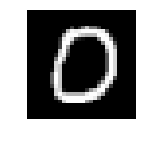

1th closest image
distance from query image: 0.083


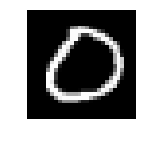

2th closest image
distance from query image: 0.100


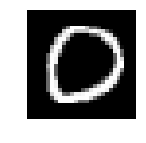

3th closest image
distance from query image: 0.117


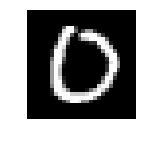

4th closest image
distance from query image: 0.124


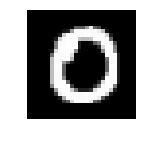

In [8]:
print('Queried example')
plot_image(images[query_index])

for i, (neighbor_index, distance) in enumerate(zip(neighbor_indices, neighbor_distances)):
    if i != 0:
        print('{}th closest image'.format(i))
        print('distance from query image: {:.3f}'.format(distance))
        plot_image(images[neighbor_index])